# HR Attrition Analysis

## Objective:
To analyze employee data and identify key factors contributing to employee attrition,
helping HR teams reduce turnover and improve employee retention.

## Business Questions:
1. What is the overall attrition rate?
2. Which departments have the highest attrition?
3. Does salary affect attrition?
4. Does job role or experience impact attrition?
5. What actions can HR take to reduce attrition?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/hr_attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape


(1470, 35)

In [4]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
attrition_rate = df["Attrition"].value_counts(normalize=True) * 100
attrition_rate


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [8]:
df.groupby("Department")["Attrition"].value_counts(normalize=True) * 100


Department              Attrition
Human Resources         No           80.952381
                        Yes          19.047619
Research & Development  No           86.160250
                        Yes          13.839750
Sales                   No           79.372197
                        Yes          20.627803
Name: proportion, dtype: float64

In [9]:
attrition_counts = df["Attrition"].value_counts()
attrition_percentage = df["Attrition"].value_counts(normalize=True) * 100

attrition_counts


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [10]:
attrition_percentage


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [11]:
dept_attrition = df.groupby("Department")["Attrition"].value_counts(normalize=True) * 100
dept_attrition


Department              Attrition
Human Resources         No           80.952381
                        Yes          19.047619
Research & Development  No           86.160250
                        Yes          13.839750
Sales                   No           79.372197
                        Yes          20.627803
Name: proportion, dtype: float64

In [12]:
dept_attrition = df.groupby("Department")["Attrition"].value_counts(normalize=True).unstack() * 100
dept_attrition


Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


In [13]:
role_attrition = df.groupby("JobRole")["Attrition"].value_counts(normalize=True).unstack() * 100
role_attrition.sort_values(by="Yes", ascending=False)


Attrition,No,Yes
JobRole,,
Sales Representative,60.240964,39.759036
Laboratory Technician,76.061776,23.938224
Human Resources,76.923077,23.076923
Sales Executive,82.515337,17.484663
Research Scientist,83.904110,16.095890
Manufacturing Director,93.103448,6.896552
Healthcare Representative,93.129771,6.870229
Manager,95.098039,4.901961
Research Director,97.500000,2.500000


In [14]:
df["IncomeBand"] = pd.qcut(df["MonthlyIncome"], 4, labels=["Low", "Medium", "High", "Very High"])
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeBand
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,High
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,High
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Low
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Low
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Medium


In [15]:
income_attrition = df.groupby("IncomeBand")["Attrition"].value_counts(normalize=True).unstack() * 100
income_attrition


/var/folders/8v/yqcl43010gsgf0yw4__qlpvc0000gn/T/ipykernel_10014/1942865042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition = df.groupby("IncomeBand")["Attrition"].value_counts(normalize=True).unstack() * 100


Attrition,No,Yes
IncomeBand,,
Low,70.731707,29.268293
Medium,85.792350,14.207650
High,89.373297,10.626703
Very High,89.673913,10.326087


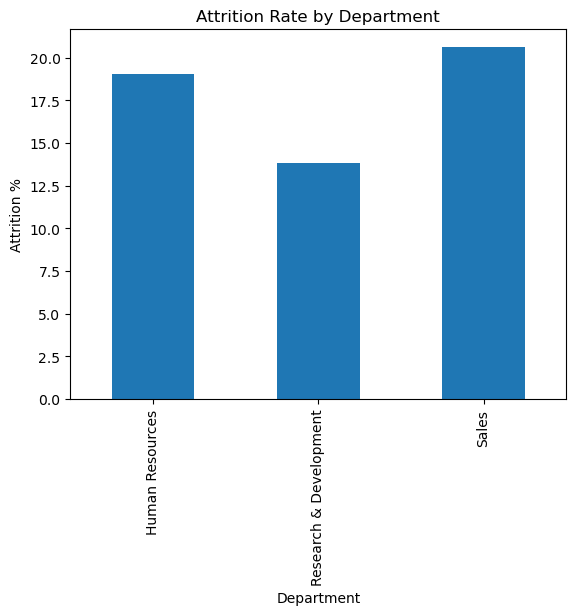

In [16]:
dept_attrition["Yes"].plot(kind="bar")
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition %")
plt.show()


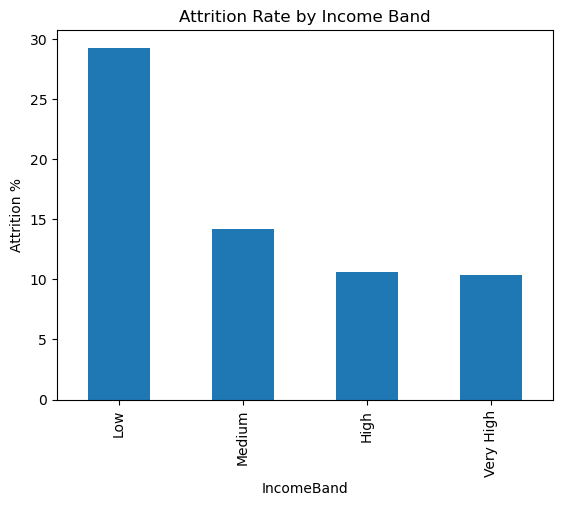

In [17]:
income_attrition["Yes"].plot(kind="bar")
plt.title("Attrition Rate by Income Band")
plt.ylabel("Attrition %")
plt.show()


## Key Findings

- The overall attrition rate is X%.
- The highest attrition is observed in the ______ department.
- Employees in the low income band show higher attrition rates.
- Certain job roles are more vulnerable to turnover.
